# Customer Segmentation for Marketing Strategy

Marketing campaigns are a critical aspect of any business, focusing on customer needs, satisfaction,
and overall success. The effectiveness of a marketing campaign hinges on various factors, including
population segmentation, distribution channels, and promotional strategies.
As a leader in the marketing analytics team of a prominent banking institution, our mission is to
address a significant challenge. The bank has experienced a decline in revenue, primarily attributed
to reduced client deposits. Term deposits offer an opportunity for the bank to secure deposits for
specific durations, enabling more lending and increased profits. Furthermore, term deposit clients
are valuable prospects for other financial products, such as funds and insurance, which can further
boost revenue.
Our arsenal includes a dataset containing extensive details of marketing campaigns conducted via
phone, encompassing customer demographics, previous campaign interactions, and more. Our
objective is crystal clear: we aim to predict with precision whether customers will subscribe to term
deposits after these campaigns. By harnessing the power of data and analytics, we will provide
actionable insights to help the bank make informed decisions and reinvigorate its revenue streams.
You are provided a dataset containing details of marketing campaigns done via phone with various
details for customers such as demographics, last campaign details etc. Can you help the bank to
predict accurately whether the customer will subscribe to the focus product for the campaign - Term
Deposit after the campaign?


In [6]:
# importing libraries necessary for EDA and data preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Week 1 :  Data Preprocessing: Cleanse and preprocess the dataset, addressing any missing values**,**outliers, or necessary data transformations.

## **1.Load The Data**

In [7]:
# loading the e-commerce churn analysis dataset and saving it as churn_data
cus_data = pd.read_csv('/content/Train.csv')

In [8]:
#copying and saving the dataset as data inorder to retain the original dataset
df = cus_data.copy()
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


# **2.Inspect the Data**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [10]:
# displays the size of the dataset
df.shape

(31647, 18)

In [11]:
# gives the count of unique values in the variables
df.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [12]:
# counts the number of null values
df.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [13]:
# displays the count of duplicates
df.duplicated().sum()

0

In [14]:
# gives the count of different datatypes variables in the dataset
df.dtypes.value_counts()

object     10
float64     5
int64       3
Name: count, dtype: int64

In [15]:
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [16]:
# Get descriptive statistics
print(df.describe())

       customer_age        balance  day_of_month  last_contact_duration  \
count  31028.000000   31248.000000  31647.000000           31336.000000   
mean      40.439216    1368.112615     15.818561             256.184038   
std       10.751392    3085.342417      8.322970             256.181479   
min       18.000000   -8020.000000      1.000000               0.000000   
25%       32.000000      72.000000      8.000000             103.000000   
50%       39.000000     449.000000     16.000000             179.000000   
75%       48.000000    1413.000000     21.000000             315.250000   
max       97.000000  102128.000000     31.000000            4900.000000   

       num_contacts_in_campaign  days_since_prev_campaign_contact  \
count              31535.000000                       5816.000000   
mean                   2.776629                        224.995186   
std                    3.153293                        114.991828   
min                    1.000000                 

# **3. Handle Missing Values**

In [17]:
# Check for missing values
no_bold_text = "\033[1mNumber of missing values\033[0m"
print(no_bold_text)
missing_values = df.isnull().sum()

  # Display columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
pe_bold_text = "\033[1mPercentage of missing values\033[0m"
print(pe_bold_text)
print(missing_percentage)

Number of missing values
customer_age                          619
marital                               150
balance                               399
personal_loan                         149
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
dtype: int64
Percentage of missing values
customer_age                         1.955952
marital                              0.473979
balance                              1.260783
personal_loan                        0.470819
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
dtype: float64


# **Skewness**

In [18]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# List of column names to be removed
remove_columns = ['term_deposit_subscribed']

# Remove specified columns from the list of numerical columns
col = [col for col in numerical_columns if col not in remove_columns]

print("Numerical columns:", col)

# Calculate skewness for each remaining numerical column
skewness = df[col].apply(lambda x: skew(x.dropna()))

print("Skewness of numerical columns:\n", skewness)

Numerical columns: ['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign']
Skewness of numerical columns:
 customer_age                         0.661921
balance                              8.504719
day_of_month                         0.091905
last_contact_duration                3.165717
num_contacts_in_campaign             4.999934
days_since_prev_campaign_contact     0.649311
num_contacts_prev_campaign          45.830834
dtype: float64


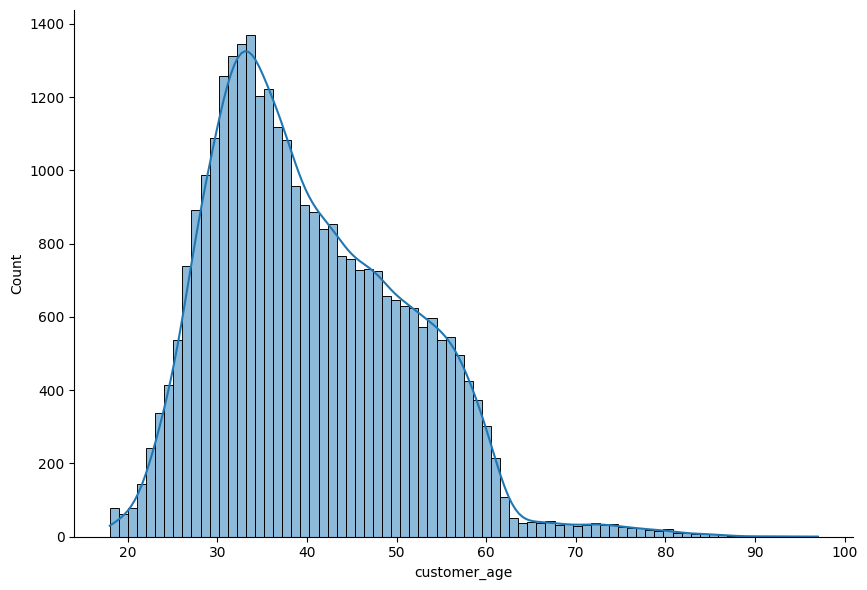

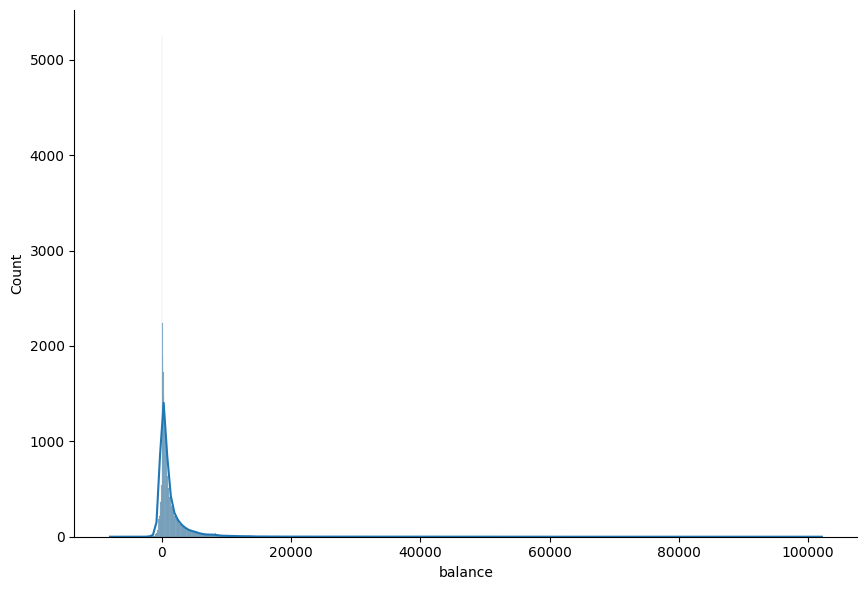

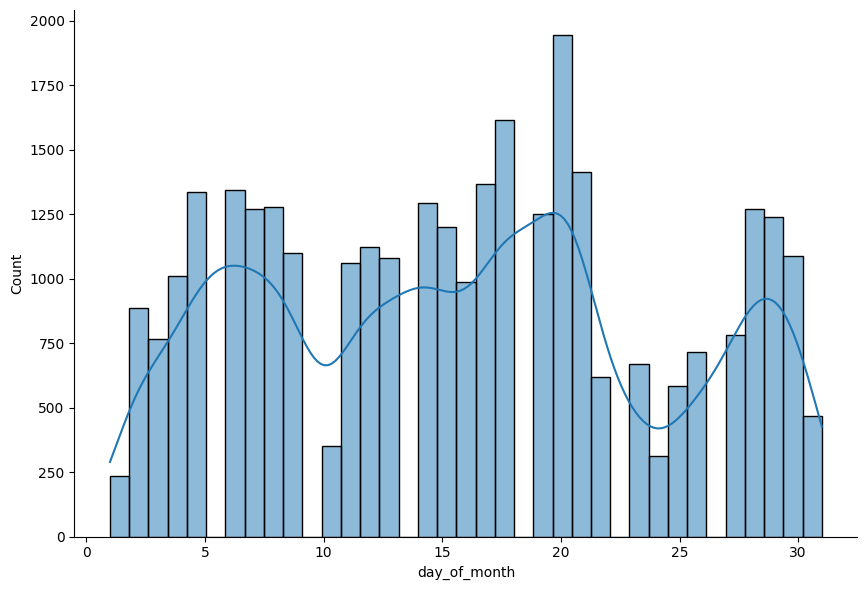

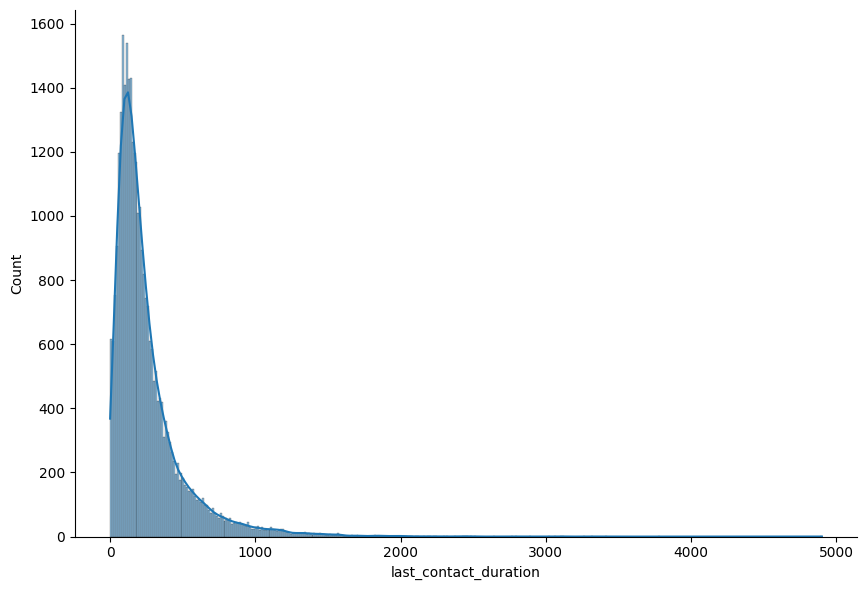

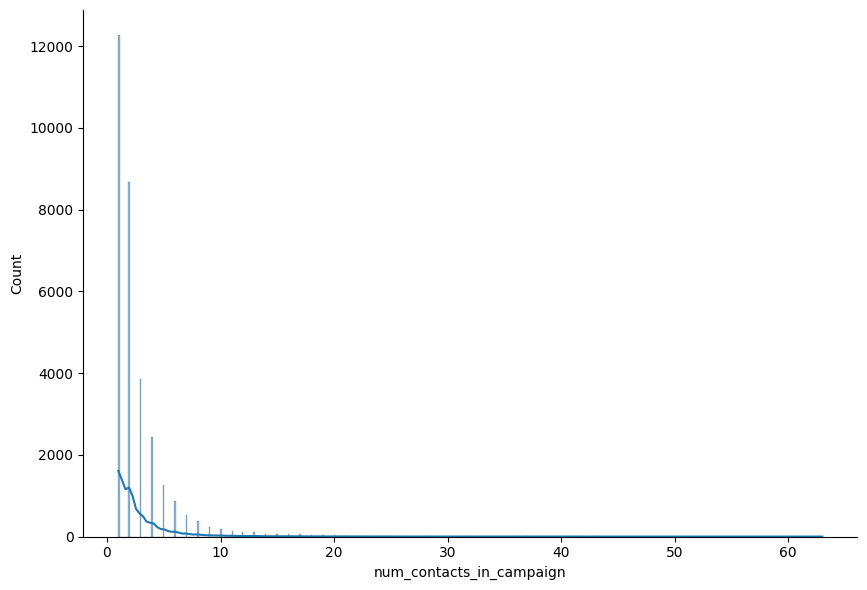

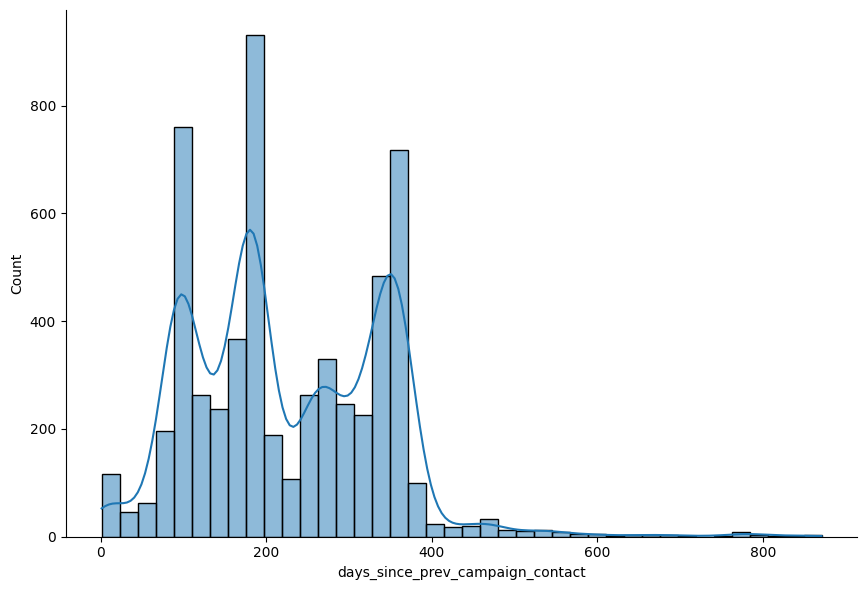

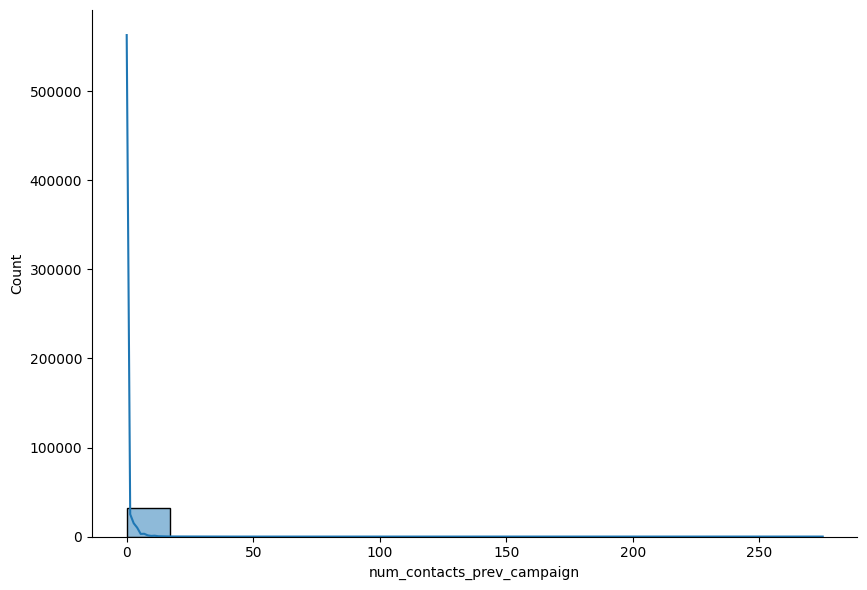

In [19]:
for columns in col:
  sns.displot(data=df, x=columns, kde=True,height=6, aspect=11.7/8)

# Skewness Graph

The given distribution plots indicate the skewness or distribution of feature that contain missing values. The inferences taken from the graph are:


*   Three Columns are indicates normal distribution(customer_age,day_of_month,days_since_prev_campaign_contact) - Mean
*   Rest of the Four columns shows right skewness (Positive) (balancelast_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign)  - Median



In [20]:
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

# Missing Value Imputation

1. Simple imputation

In [21]:
# Determine imputation method based on skewness
imputation_methods = {}

for column in col:
    if abs(skewness[column]) < 0.7:
        imputation_methods[column] = 'mean'
    else:
        imputation_methods[column] = 'median'

print("Chosen imputation methods:\n", imputation_methods)

# Apply imputation
for column in col:
    if imputation_methods[column] == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif imputation_methods[column] == 'median':
        imputer = SimpleImputer(strategy='median')

    df[column] = imputer.fit_transform(df[[column]])

print("Imputed DataFrame:\n", df.head())

Chosen imputation methods:
 {'customer_age': 'mean', 'balance': 'median', 'day_of_month': 'mean', 'last_contact_duration': 'median', 'num_contacts_in_campaign': 'median', 'days_since_prev_campaign_contact': 'mean', 'num_contacts_prev_campaign': 'median'}
Imputed DataFrame:
          id  customer_age     job_type  marital  education default  balance  \
0  id_43823          28.0   management   single   tertiary      no    285.0   
1  id_32289          34.0  blue-collar  married  secondary      no    934.0   
2  id_10523          46.0   technician  married  secondary      no    656.0   
3  id_43951          34.0     services   single  secondary      no      2.0   
4  id_40992          41.0  blue-collar  married    primary      no   1352.0   

  housing_loan personal_loan communication_type  day_of_month month  \
0          yes            no            unknown          26.0   jun   
1           no           yes           cellular          18.0   nov   
2           no            no         

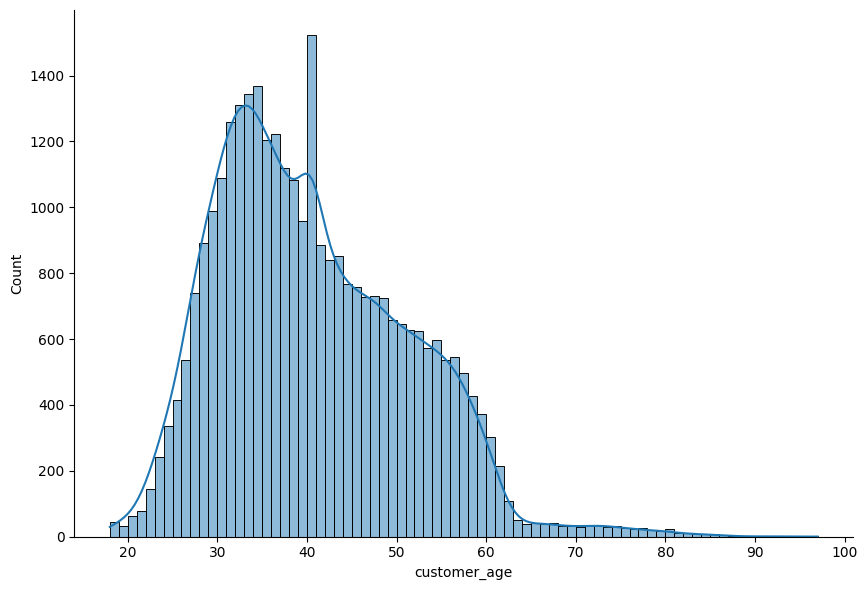

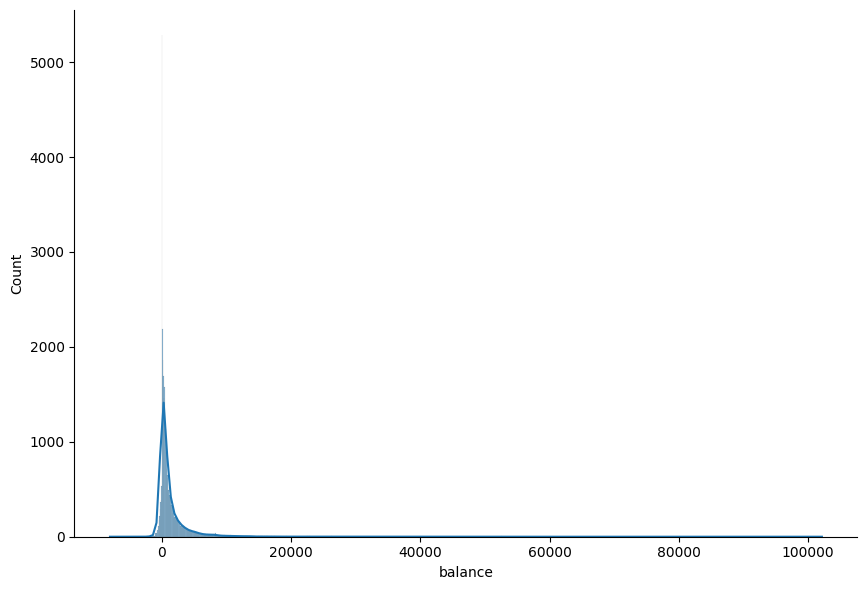

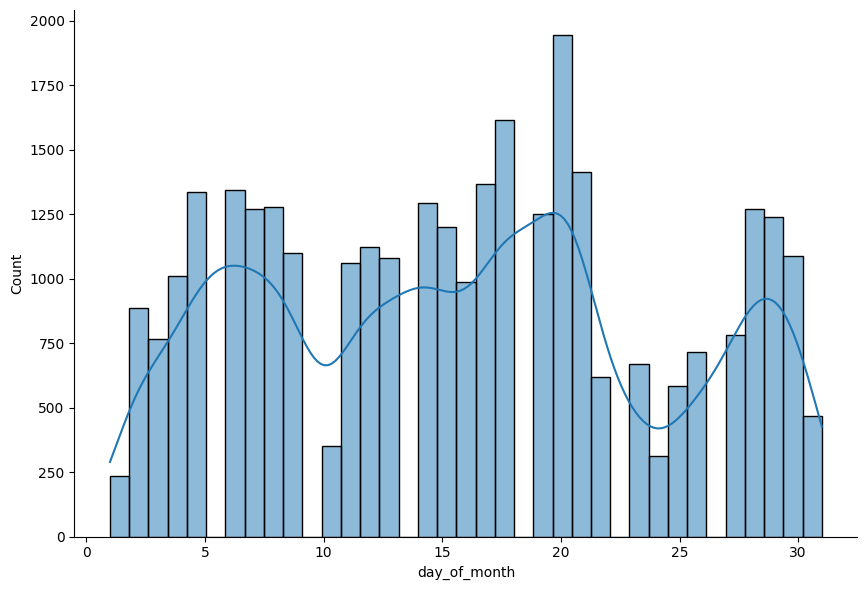

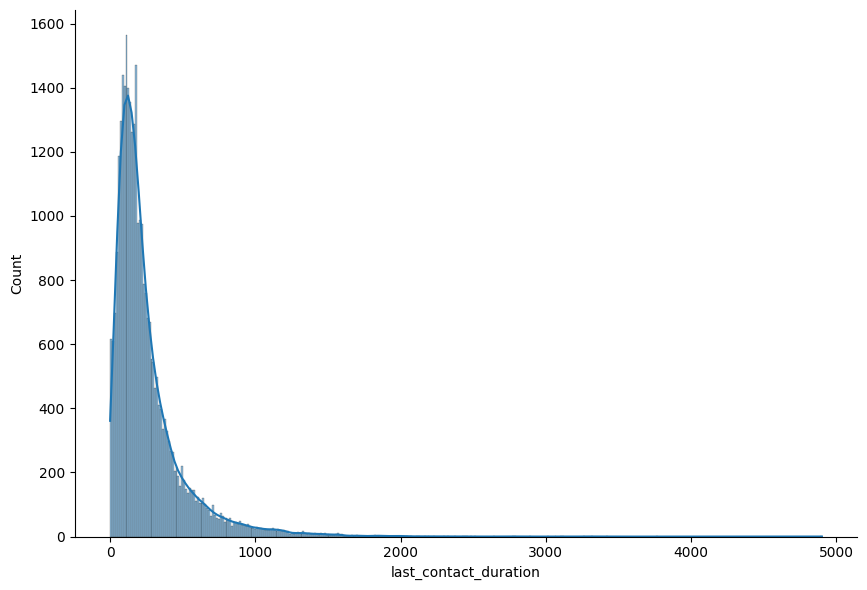

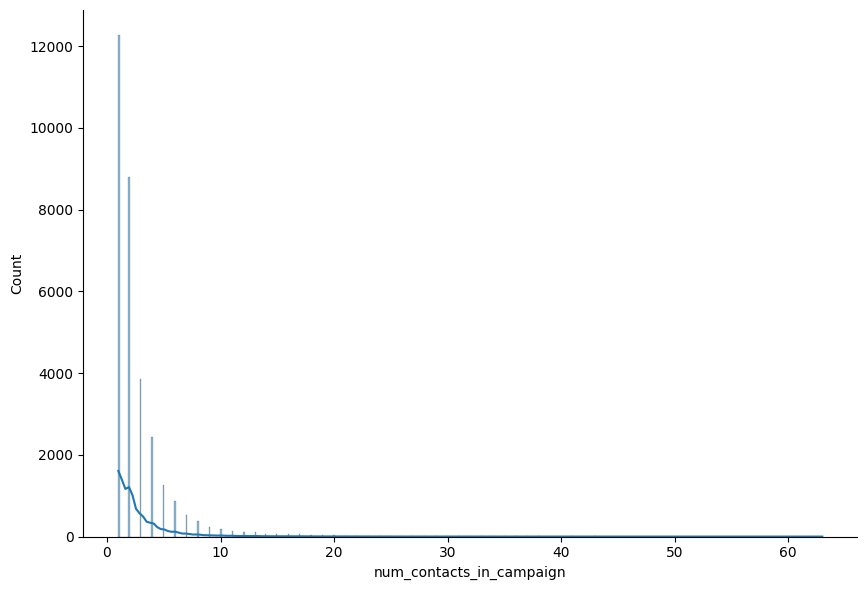

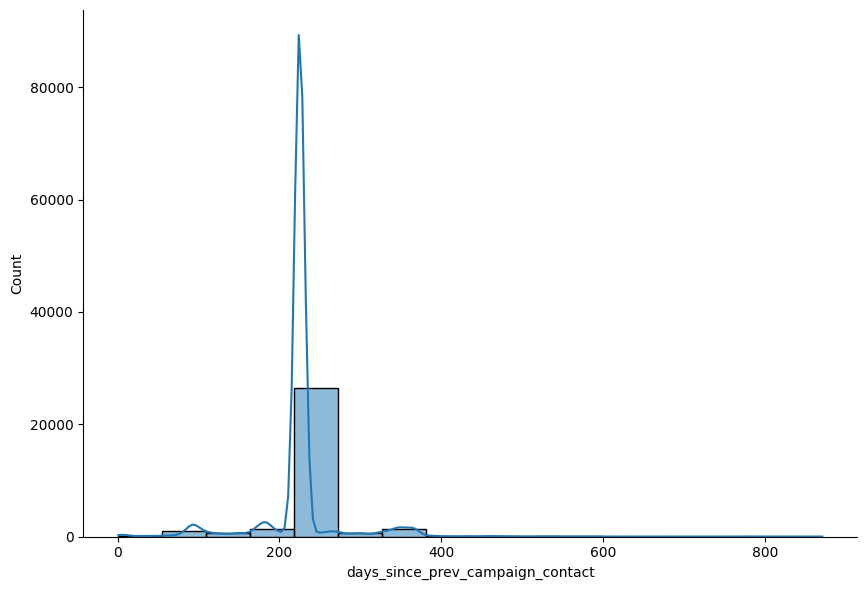

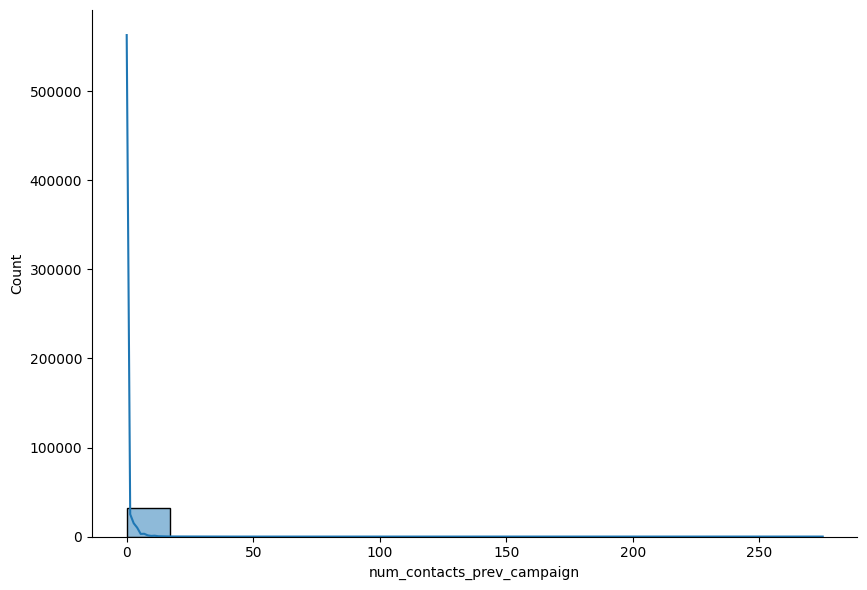

In [22]:
for columns in col:
  sns.displot(data=df, x=columns, kde=True,height=6, aspect=11.7/8)

**Ensured that the imputation did not significantly altered the distribution.**

2. Advanced Imputation
   (KNN imputation)

In [46]:
cols=df.columns
# Should be done after encoding and before scaling
from sklearn.impute import KNNImputer
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=2)

# Fit the imputer on the data and transform it
data = imputer.fit_transform(df)

# Convert the numpy array back to a DataFrame with the original columns
data = pd.DataFrame(data,columns=cols)
data

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,26367.0,28.0,4.0,2.0,2.0,0.0,285.0,1.0,0.0,2.0,26.0,6.0,303.0,4.0,224.995186,0.0,3.0,0.0
1,17403.0,34.0,1.0,1.0,1.0,0.0,934.0,0.0,1.0,0.0,18.0,9.0,143.0,2.0,132.000000,1.0,1.0,0.0
2,418.0,46.0,9.0,1.0,1.0,0.0,656.0,0.0,0.0,0.0,5.0,3.0,101.0,4.0,224.995186,0.0,3.0,0.0
3,26468.0,34.0,7.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0,20.0,8.0,127.0,3.0,224.995186,0.0,3.0,0.0
4,24163.0,41.0,1.0,1.0,0.0,0.0,1352.0,1.0,0.0,0.0,13.0,8.0,49.0,2.0,224.995186,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,13459.0,58.0,0.0,1.0,1.0,0.0,567.0,1.0,0.0,0.0,2.0,3.0,99.0,2.0,265.000000,3.0,1.0,0.0
31643,8131.0,51.0,4.0,1.0,2.0,0.0,1072.0,0.0,0.0,2.0,20.0,6.0,31.0,7.0,224.995186,0.0,3.0,0.0
31644,27025.0,41.0,10.0,1.0,0.0,0.0,242.0,1.0,0.0,2.0,23.0,8.0,89.0,2.0,224.995186,0.0,3.0,0.0
31645,27680.0,48.0,7.0,1.0,1.0,0.0,2699.0,0.0,0.0,0.0,11.0,1.0,216.0,6.0,224.995186,0.0,3.0,0.0


# **4.Detecting Outliers**

In [24]:
df.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.439216,1356.524599,15.818561,255.425538,2.773881,224.995186,0.591620,0.107246
std,10.645723,3067.545042,8.322970,255.033242,3.148046,49.292679,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,75.000000,8.000000,103.000000,1.000000,224.995186,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,224.995186,0.000000,0.000000
75%,48.000000,1394.000000,21.000000,313.000000,3.000000,224.995186,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


**Outlier Visualisation**

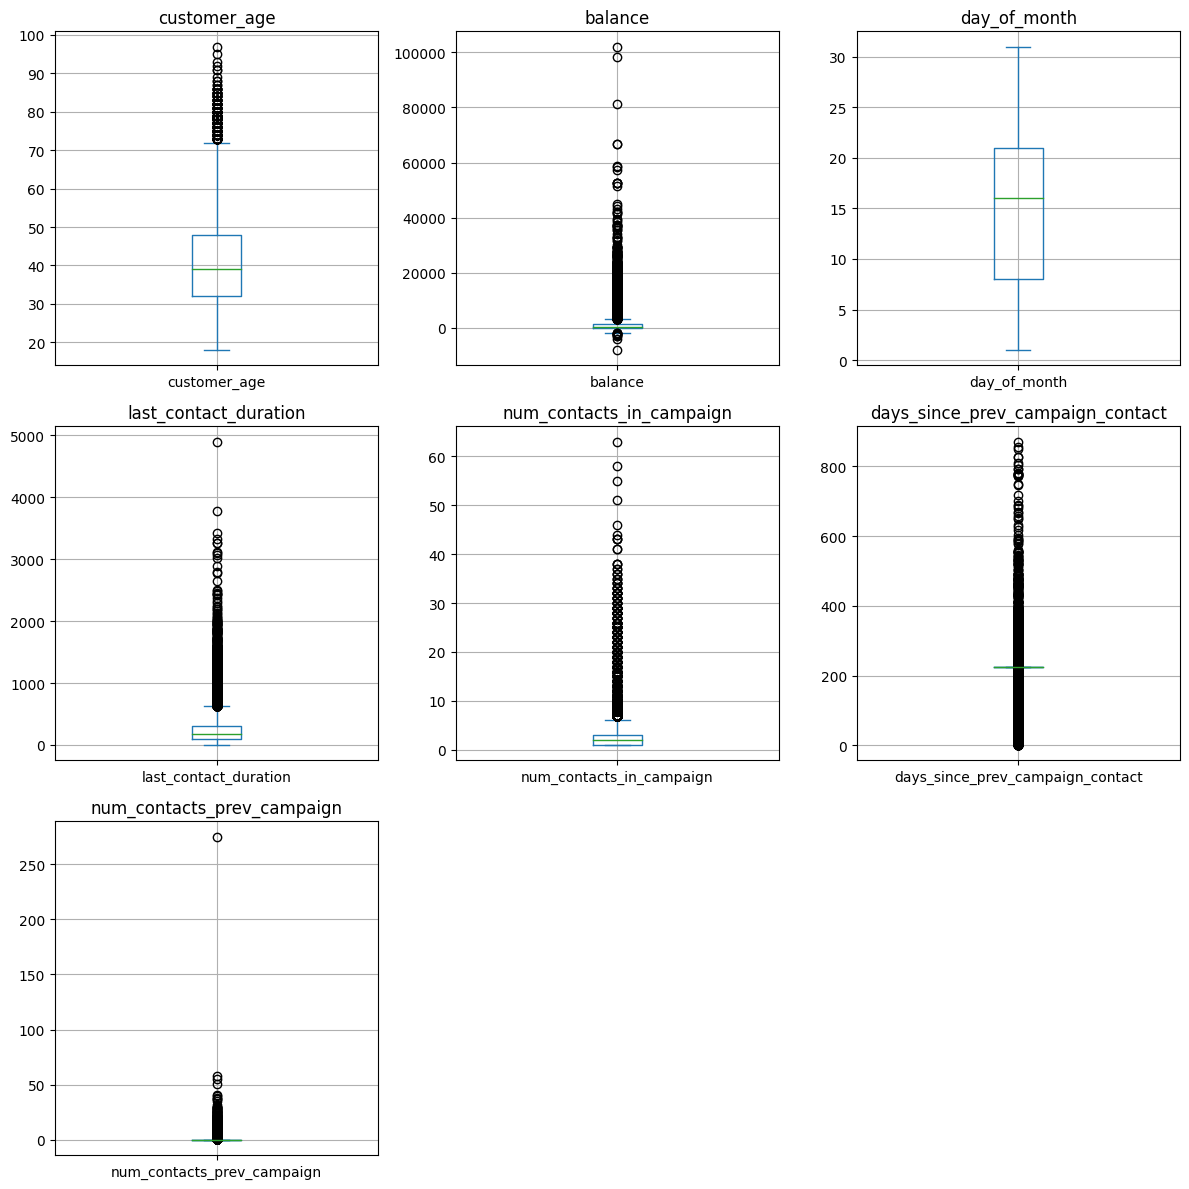

In [25]:


# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot boxplots for each feature
for i, feature in enumerate(col):
    if feature in df.columns:
        df[feature].plot(kind='box', ax=axes[i], fontsize=10)
        axes[i].set_title(feature)
        axes[i].grid(True)
    else:
        axes[i].set_visible(False)  # Hide the subplot if the feature is not in the DataFrame

# Hide any unused subplots if there are fewer than 20 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [26]:


outlier_info = {}

for col in col:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(df)) * 100

    # Store the results
    outlier_info[col] = {
        'Number of Outliers': len(outliers),
        'Percentage of Outliers': outlier_percentage
    }

# Display the outlier information
for col, info in outlier_info.items():
    print(f"{col}: {info['Number of Outliers']} outliers, {info['Percentage of Outliers']:.2f}%")

customer_age: 257 outliers, 0.81%
balance: 3381 outliers, 10.68%
day_of_month: 0 outliers, 0.00%
last_contact_duration: 2328 outliers, 7.36%
num_contacts_in_campaign: 2178 outliers, 6.88%
days_since_prev_campaign_contact: 5816 outliers, 18.38%
num_contacts_prev_campaign: 5816 outliers, 18.38%


In [27]:
# do this only for continuous numeric variables
df1 = df.copy()

class DataFrameOutlierDetector:
  def __init__(self, df1):
    self.df1 = df1

  def detect_outliers(self, column_name):

    Q1 = self.df1[column_name].quantile(0.25)
    Q3 = self.df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = self.df1[(self.df1[column_name] < lower_bound) | (self.df1[column_name] > upper_bound)]

    outlier_df=pd.DataFrame(outliers)
    return outlier_df

  def outlier_describe(self, column_name):

    original_stats = self.df1[column_name].describe()
    outlier = self.detect_outliers(column_name)
    non_outliers = self.df1[~self.df1.index.isin(outlier.index)]
    non_outlier_stats = non_outliers[column_name].describe()

    return pd.DataFrame({
        'with_outliers': original_stats,
        'without_outliers': non_outlier_stats
    })

  def plot_box(self, column_name):

    plt.figure(figsize=(6, 4))
    self.df1.boxplot(column=column_name)
    plt.title(f'Box plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

detector = DataFrameOutlierDetector(df1)

In [28]:
df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

# Outlier Analysis

1.Customer Age

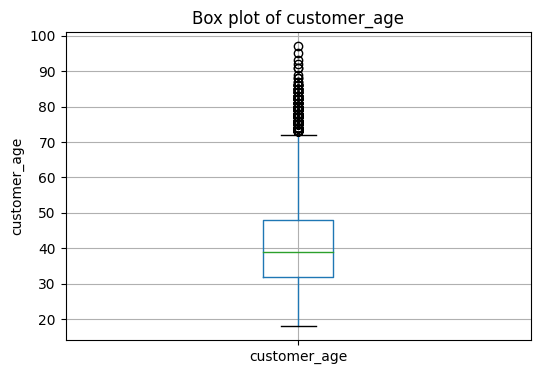

In [29]:
detector.plot_box('customer_age')

In [30]:
detector.detect_outliers('customer_age')

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
261,id_631,78.0,retired,married,secondary,no,8303.0,no,no,telephone,9.0,jun,730.0,1.0,64.000000,12.0,failure,1
302,id_32074,76.0,retired,married,secondary,no,2656.0,no,no,cellular,10.0,nov,261.0,5.0,224.995186,0.0,unknown,1
521,id_751,73.0,retired,married,primary,no,-5.0,no,no,cellular,28.0,jun,344.0,6.0,94.000000,6.0,failure,0
620,id_1995,88.0,retired,married,primary,no,5235.0,no,no,telephone,1.0,apr,568.0,2.0,224.995186,0.0,unknown,1
638,id_43319,73.0,retired,divorced,primary,no,803.0,no,no,cellular,9.0,sep,460.0,5.0,224.995186,0.0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30745,id_41356,74.0,retired,divorced,primary,no,2688.0,no,no,cellular,21.0,oct,115.0,2.0,224.995186,0.0,unknown,1
31108,id_11828,78.0,retired,divorced,primary,no,953.0,no,no,cellular,27.0,sep,186.0,2.0,280.000000,1.0,other,1
31221,id_33080,77.0,retired,married,unknown,no,995.0,no,no,cellular,27.0,oct,125.0,2.0,224.995186,0.0,unknown,0
31410,id_19959,76.0,retired,married,primary,no,297.0,no,no,cellular,7.0,sep,518.0,2.0,224.995186,0.0,unknown,0


In [31]:
detector.outlier_describe('customer_age')

,with_outliers,without_outliers
count,31647.000000,31390.000000
mean,40.439216,40.131375
std,10.645723,10.120592
min,18.000000,18.000000
25%,32.000000,32.000000
50%,39.000000,39.000000
75%,48.000000,47.000000
max,97.000000,72.000000


2. Balance

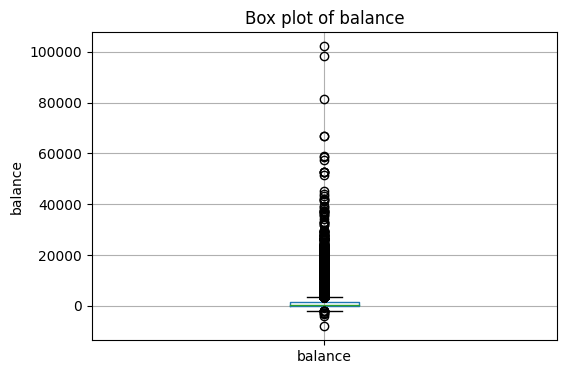

In [32]:
detector.plot_box('balance')

In [33]:
detector.detect_outliers('balance')

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
11,id_17866,35.0,technician,single,secondary,no,5212.0,yes,no,cellular,7.0,may,303.0,2.0,224.995186,0.0,unknown,0
13,id_43255,50.0,management,married,secondary,no,4873.0,no,no,telephone,6.0,feb,381.0,6.0,213.000000,9.0,failure,0
28,id_6701,45.0,admin.,single,secondary,no,10390.0,yes,no,cellular,20.0,nov,101.0,1.0,224.995186,0.0,unknown,0
47,id_45069,32.0,management,married,secondary,no,4136.0,yes,no,cellular,12.0,may,94.0,4.0,224.995186,0.0,unknown,0
51,id_10463,40.0,blue-collar,single,primary,no,3380.0,yes,no,telephone,20.0,nov,46.0,1.0,224.995186,0.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31609,id_16084,43.0,self-employed,married,tertiary,no,5996.0,yes,no,cellular,18.0,nov,281.0,1.0,224.995186,0.0,unknown,0
31616,id_26205,54.0,technician,divorced,primary,no,7292.0,yes,no,unknown,30.0,may,160.0,1.0,224.995186,0.0,unknown,0
31617,id_40252,51.0,blue-collar,married,tertiary,no,5418.0,yes,no,cellular,21.0,nov,59.0,3.0,224.995186,0.0,unknown,0
31623,id_44365,41.0,management,married,tertiary,no,7032.0,no,no,cellular,17.0,nov,80.0,1.0,224.995186,0.0,unknown,0


In [34]:
detector.outlier_describe('balance')

,with_outliers,without_outliers
count,31647.000000,28266.000000
mean,1356.524599,625.213437
std,3067.545042,820.008635
min,-8020.000000,-1880.000000
25%,75.000000,47.000000
50%,449.000000,357.000000
75%,1394.000000,950.000000
max,102128.000000,3372.000000


2. Day of Month

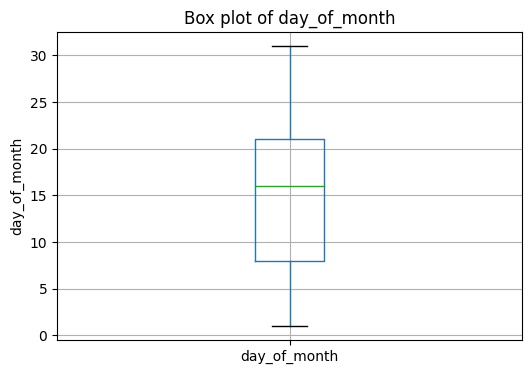

,with_outliers,without_outliers
count,31647.000000,31647.000000
mean,15.818561,15.818561
std,8.322970,8.322970
min,1.000000,1.000000
25%,8.000000,8.000000
50%,16.000000,16.000000
75%,21.000000,21.000000
max,31.000000,31.000000


In [35]:
detector.plot_box('day_of_month')
detector.detect_outliers('day_of_month')
detector.outlier_describe('day_of_month')

In [36]:
detector.detect_outliers('day_of_month')

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed


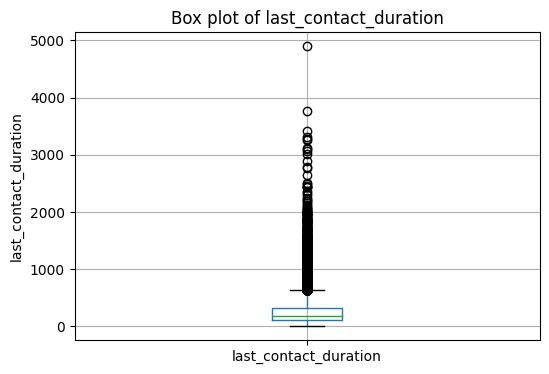

,with_outliers,without_outliers
count,31647.000000,29319.000000
mean,255.425538,200.256455
std,255.033242,137.254631
min,0.000000,0.000000
25%,103.000000,98.000000
50%,179.000000,169.000000
75%,313.000000,272.000000
max,4900.000000,628.000000


In [37]:
detector.plot_box('last_contact_duration')
detector.outlier_describe('last_contact_duration')


In [38]:
detector.detect_outliers('last_contact_duration')

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
6,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18.0,aug,687.0,4.0,224.995186,0.0,unknown,1
10,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19.0,nov,1195.0,3.0,160.000000,1.0,failure,0
38,id_13459,30.0,self-employed,married,secondary,no,580.0,yes,no,cellular,13.0,oct,834.0,1.0,152.000000,6.0,failure,0
53,id_10257,30.0,management,single,tertiary,no,39.0,yes,no,cellular,15.0,may,900.0,3.0,352.000000,2.0,other,1
79,id_11209,26.0,technician,single,secondary,no,249.0,no,no,cellular,29.0,jan,716.0,2.0,224.995186,0.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31576,id_27529,33.0,technician,married,secondary,no,542.0,yes,no,cellular,16.0,apr,1575.0,1.0,234.000000,4.0,failure,1
31583,id_44611,47.0,blue-collar,divorced,primary,no,127.0,yes,no,unknown,3.0,jun,2450.0,2.0,224.995186,0.0,unknown,1
31585,id_42747,32.0,self-employed,married,secondary,no,5612.0,yes,no,cellular,28.0,jul,716.0,3.0,224.995186,0.0,unknown,1
31638,id_26369,28.0,entrepreneur,married,secondary,no,449.0,yes,no,unknown,27.0,may,1303.0,1.0,224.995186,0.0,unknown,0


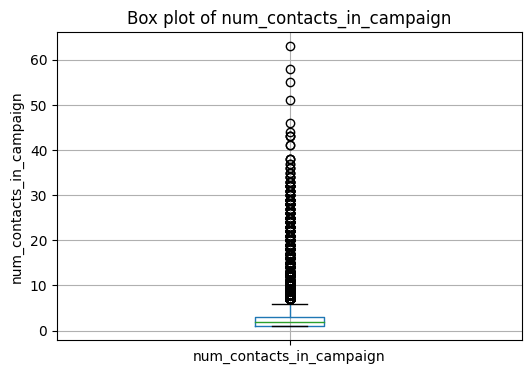

,with_outliers,without_outliers
count,31647.000000,29469.000000
mean,2.773881,2.125590
std,3.148046,1.310883
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,63.000000,6.000000


In [39]:
detector.plot_box('num_contacts_in_campaign')
detector.outlier_describe('num_contacts_in_campaign')

In [40]:
detector.detect_outliers('num_contacts_in_campaign')

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
36,id_1993,36.0,admin.,married,secondary,no,-327.0,yes,no,cellular,29.0,jul,117.0,8.0,224.995186,0.0,unknown,0
39,id_14583,32.0,self-employed,divorced,secondary,no,96.0,yes,no,unknown,17.0,jun,83.0,10.0,224.995186,0.0,unknown,0
43,id_3555,29.0,management,single,tertiary,no,50.0,no,yes,cellular,31.0,jul,17.0,17.0,224.995186,0.0,unknown,0
59,id_7224,47.0,management,married,tertiary,no,4113.0,no,no,cellular,18.0,aug,128.0,13.0,224.995186,0.0,unknown,0
60,id_2873,37.0,management,married,tertiary,no,88.0,yes,no,unknown,19.0,may,149.0,10.0,224.995186,0.0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31618,id_40514,39.0,technician,divorced,tertiary,no,768.0,no,no,cellular,27.0,aug,95.0,8.0,224.995186,0.0,unknown,0
31624,id_43217,34.0,technician,married,tertiary,no,44.0,no,no,cellular,27.0,aug,48.0,14.0,224.995186,0.0,unknown,0
31625,id_110,38.0,blue-collar,married,secondary,no,212.0,yes,no,unknown,16.0,jun,267.0,15.0,224.995186,0.0,unknown,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20.0,jun,31.0,7.0,224.995186,0.0,unknown,0


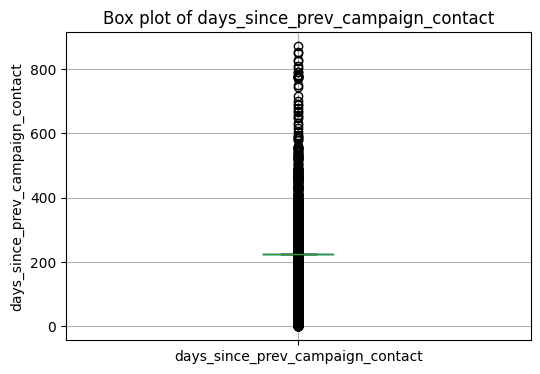

,with_outliers,without_outliers
count,31647.000000,25831.000000
mean,224.995186,224.995186
std,49.292679,0.000000
min,1.000000,224.995186
25%,224.995186,224.995186
50%,224.995186,224.995186
75%,224.995186,224.995186
max,871.000000,224.995186


In [41]:
detector.plot_box('days_since_prev_campaign_contact')
detector.outlier_describe('days_since_prev_campaign_contact')

In [42]:
detector.detect_outliers('days_since_prev_campaign_contact')

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18.0,nov,143.0,2.0,132.0,1.0,other,0
10,id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19.0,nov,1195.0,3.0,160.0,1.0,failure,0
13,id_43255,50.0,management,married,secondary,no,4873.0,no,no,telephone,6.0,feb,381.0,6.0,213.0,9.0,failure,0
15,id_12246,42.0,management,married,tertiary,no,55.0,yes,no,cellular,17.0,nov,57.0,1.0,126.0,3.0,failure,0
17,id_31616,41.0,technician,married,secondary,no,-3.0,yes,no,cellular,16.0,apr,138.0,1.0,300.0,1.0,failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31629,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,2.0,jul,141.0,1.0,91.0,6.0,failure,0
31636,id_24068,45.0,services,divorced,primary,no,92.0,yes,no,cellular,17.0,apr,463.0,2.0,339.0,1.0,failure,0
31640,id_41466,51.0,management,single,tertiary,no,298.0,yes,no,cellular,15.0,may,432.0,4.0,375.0,1.0,failure,1
31641,id_31483,26.0,technician,single,secondary,no,459.0,no,no,cellular,29.0,jan,237.0,1.0,182.0,8.0,other,0


# **5. Encoding**

# Label Encoding

In [43]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['id', 'job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

In [44]:
# Creating a label encoder object
le = LabelEncoder()

# Applying label encoding to each specified column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [45]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,26367,28.0,4,2,2,0,285.0,1,0,2,26.0,6,303.0,4.0,224.995186,0.0,3,0
1,17403,34.0,1,1,1,0,934.0,0,1,0,18.0,9,143.0,2.0,132.000000,1.0,1,0
2,418,46.0,9,1,1,0,656.0,0,0,0,5.0,3,101.0,4.0,224.995186,0.0,3,0
3,26468,34.0,7,2,1,0,2.0,1,0,2,20.0,8,127.0,3.0,224.995186,0.0,3,0
4,24163,41.0,1,1,0,0,1352.0,1,0,0,13.0,8,49.0,2.0,224.995186,0.0,3,0


# **6. Exploratory Data Analysis**

#  Correlation Heatmap

<Axes: >

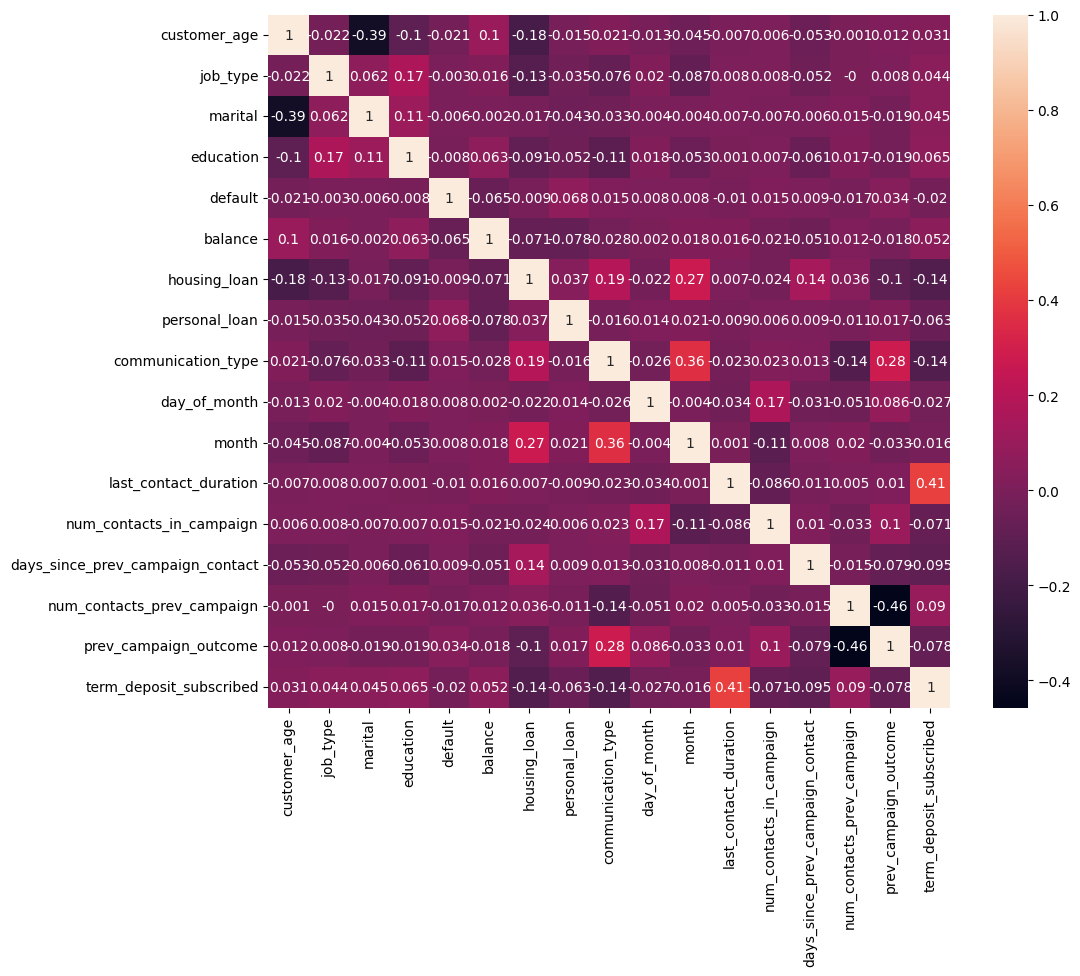

In [47]:
plt.figure(figsize=(11, 9))
df1=df.drop(columns='id')
df2=round(df1.corr(numeric_only=True),3)
sns.heatmap(df2, fmt='.2g', annot=True)

**Customer Age**

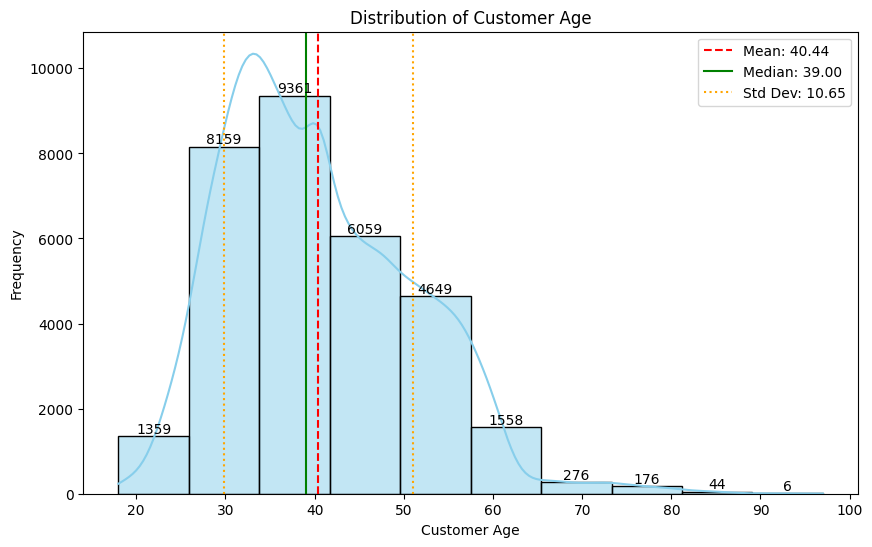

In [48]:
# Sample DataFrame
np.random.seed(0)
#df = pd.DataFrame({'customer_age': np.random.randint(18, 70, 100)})

# Calculate statistics
mean_age = df['customer_age'].mean()
median_age = df['customer_age'].median()
std_age = df['customer_age'].std()

# Create the histogram plot with a different color
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['customer_age'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Annotate counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

# Add vertical lines for mean, median, and standard deviation
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='-', linewidth=1.5, label=f'Median: {median_age:.2f}')
plt.axvline(mean_age - std_age, color='orange', linestyle=':', linewidth=1.5, label=f'Std Dev: {std_age:.2f}')
plt.axvline(mean_age + std_age, color='orange', linestyle=':', linewidth=1.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [49]:
import statsmodels.api as sm

In [50]:
import statsmodels.api as sm
# 13. Logistic Regression Analysis
df_encoded = df.copy()
#df_encoded['term_deposit_subscribed'] = df_encoded['term_deposit_subscribed'].map({'yes': 1, 'no': 0})
X = sm.add_constant(df_encoded['customer_age'])
y = df_encoded['term_deposit_subscribed']
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.340247
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     term_deposit_subscribed   No. Observations:                31647
Model:                               Logit   Df Residuals:                    31645
Method:                                MLE   Df Model:                            1
Date:                     Tue, 09 Jul 2024   Pseudo R-squ.:                0.001381
Time:                             17:19:38   Log-Likelihood:                -10768.
converged:                            True   LL-Null:                       -10783.
Covariance Type:                 nonrobust   LLR p-value:                 4.827e-08
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.4935      0.071    -35.056      0.000      -2

**Job Type**

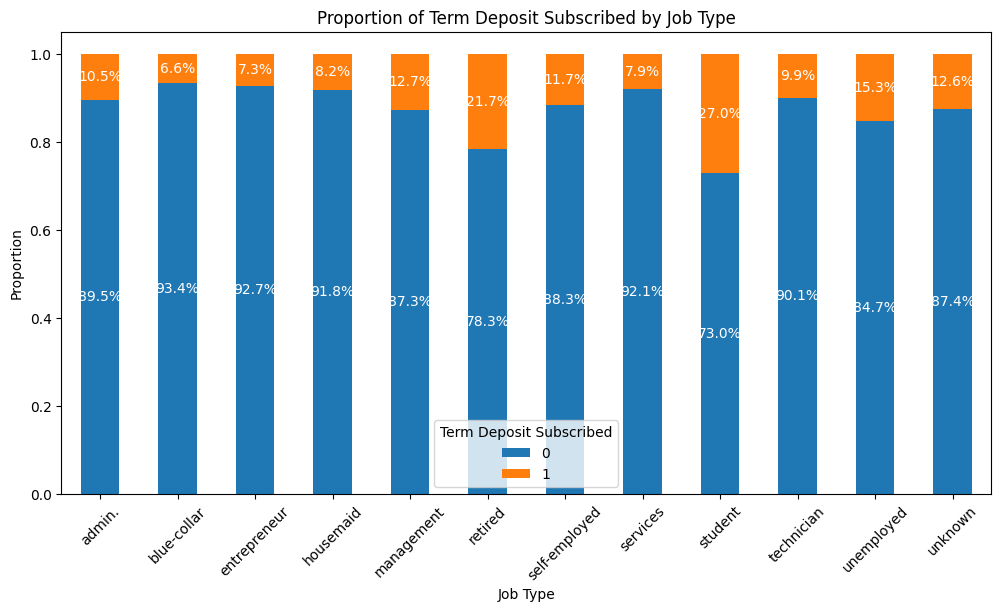

In [51]:
# Create a crosstab of job type and term deposit subscription
job_subscription = pd.crosstab(cus_data['job_type'], cus_data['term_deposit_subscribed'])

# Calculate the proportion of subscriptions
job_subscription_ratio = job_subscription.div(job_subscription.sum(1), axis=0)

# Plot the stacked bar chart
ax = job_subscription_ratio.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Proportion of Term Deposit Subscribed by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Proportion')
plt.legend(title='Term Deposit Subscribed')
plt.xticks(rotation=45)

# Annotate each bar with the corresponding percentage
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height*100:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 0),
                textcoords='offset points')

# Show the plot
plt.show()

**Martial Status**

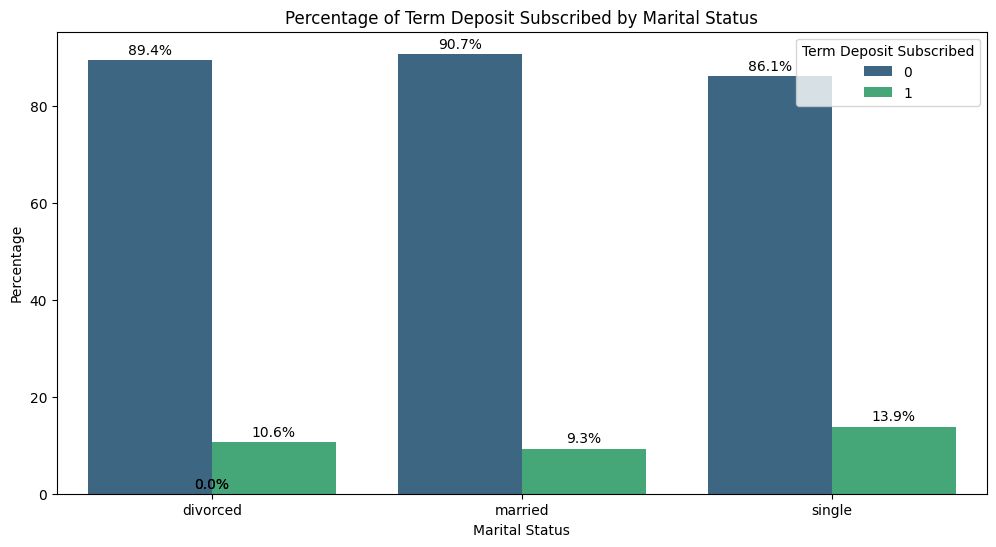

In [52]:
# Calculate the percentage of term deposit subscriptions for each marital status
marital_subscription_counts = cus_data.groupby(['marital', 'term_deposit_subscribed']).size().reset_index(name='count')
total_counts = marital_subscription_counts.groupby('marital')['count'].transform('sum')
marital_subscription_counts['percentage'] = marital_subscription_counts['count'] / total_counts * 100

# Plot the count plot with percentage annotations
plt.figure(figsize=(12, 6))
sns.barplot(data=marital_subscription_counts, x='marital', y='percentage', hue='term_deposit_subscribed', palette='viridis')

# Annotate the bars with the corresponding percentages
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 2),
                       textcoords='offset points')

plt.title('Percentage of Term Deposit Subscribed by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Term Deposit Subscribed')
plt.xticks(rotation=0)
plt.show()

In [53]:
copy_data = cus_data.copy()

**Education**

<ipython-input-55-598a72755f09>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cleaned_data, x='education', order=education_distribution.index, palette="viridis")


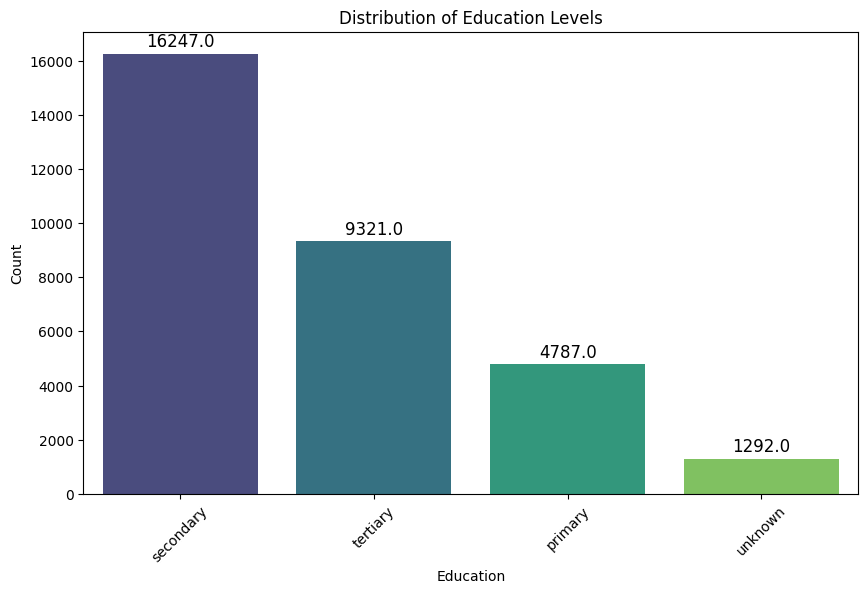

In [55]:
# Handle missing values - for simplicity, we'll drop rows with missing values in the relevant columns for this analysis
cleaned_data = copy_data.dropna(subset=['education', 'term_deposit_subscribed'])

# Distribution of education levels
education_distribution = cleaned_data['education'].value_counts()

# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cleaned_data, x='education', order=education_distribution.index, palette="viridis")
plt.title('Distribution of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [54]:
from statsmodels.graphics.mosaicplot import mosaic

<ipython-input-56-b4686c330722>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_subscription['term_deposit_subscribed'] = edu_subscription['term_deposit_subscribed'].map({0: 'No', 1: 'Yes'})


<Figure size 1800x1200 with 0 Axes>

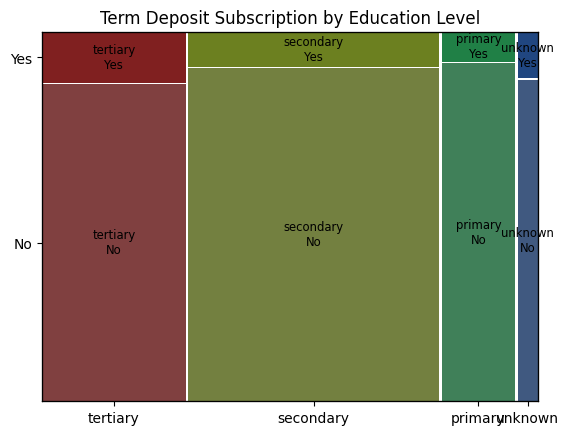

In [56]:
# Handle missing values - for simplicity, we'll drop rows with missing values in the relevant columns for this analysis
cleaned_data = copy_data.dropna(subset=['education', 'term_deposit_subscribed'])

# Prepare data for the mosaic plot
edu_subscription = cleaned_data[['education', 'term_deposit_subscribed']]
edu_subscription['term_deposit_subscribed'] = edu_subscription['term_deposit_subscribed'].map({0: 'No', 1: 'Yes'})

# Plot the mosaic plot
plt.figure(figsize=(18, 12))
mosaic(edu_subscription, ['education', 'term_deposit_subscribed'], title='Term Deposit Subscription by Education Level')
plt.show()

**Balance**

<Figure size 1200x800 with 0 Axes>

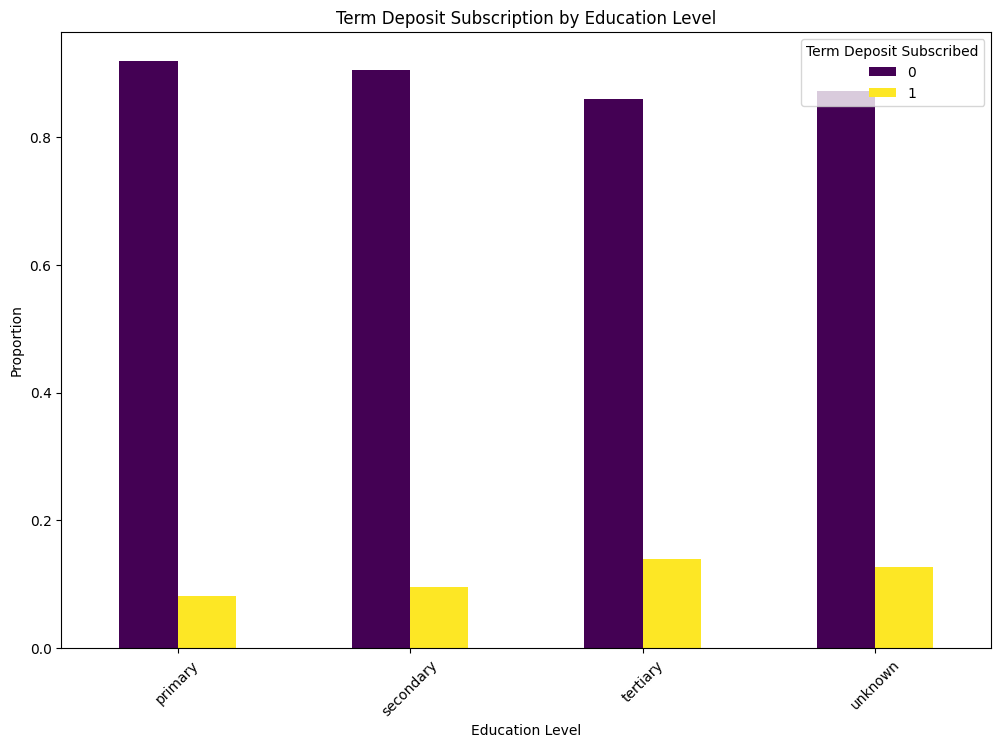

In [57]:
# Calculate proportions
education_subscription = cleaned_data.groupby('education')['term_deposit_subscribed'].value_counts(normalize=True).unstack()

# Plot the relationship - Grouped Bar Plot
plt.figure(figsize=(12, 8))
education_subscription.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')
plt.title('Term Deposit Subscription by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.legend(title='Term Deposit Subscribed', loc='upper right')
plt.xticks(rotation=45)
plt.show()

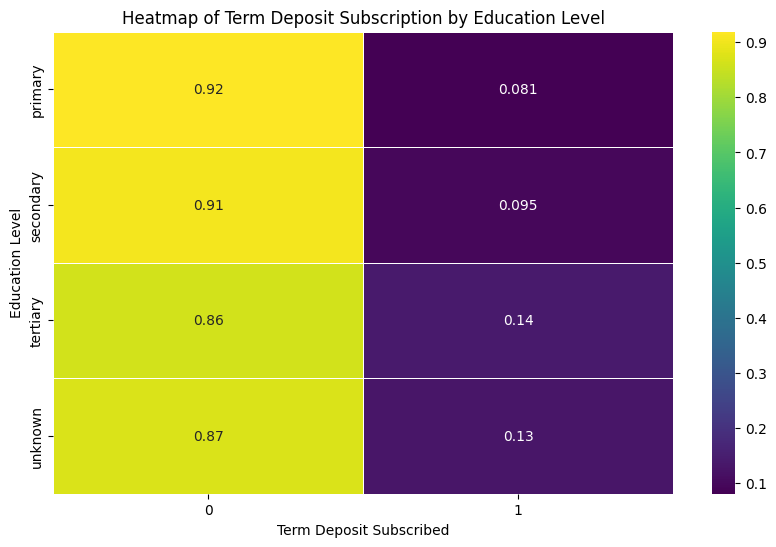

In [58]:
# Plot the relationship - Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(education_subscription, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Term Deposit Subscription by Education Level')
plt.xlabel('Term Deposit Subscribed')
plt.ylabel('Education Level')
plt.show()



*   Heatmap: The heatmap visually emphasizes differences in subscription rates across education levels. Darker shades can indicate higher subscription rates for specific education levels.





**Default**

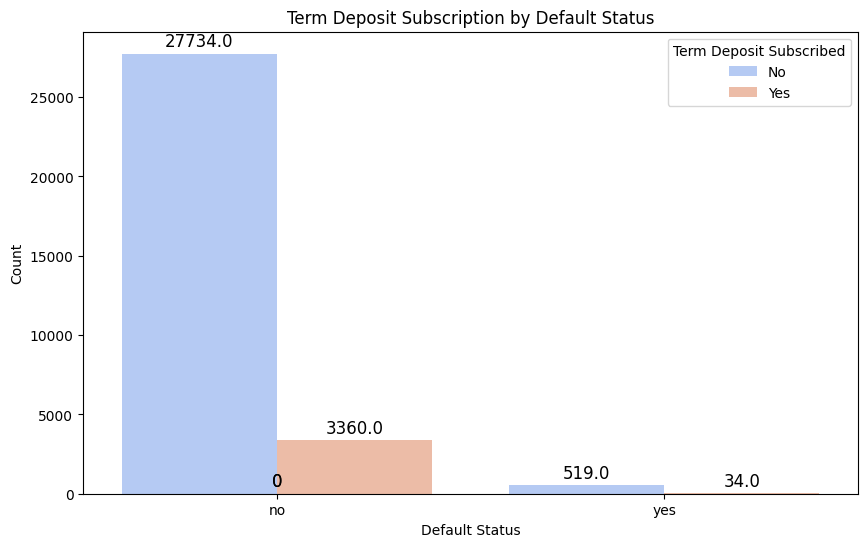

In [59]:
# Handle missing values - we'll drop rows with missing values in the relevant columns for this analysis
cleaned_data = copy_data.dropna(subset=['default', 'term_deposit_subscribed'])

# Bar Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cleaned_data, x='default', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [60]:
# Pivot Table
pivot_table = cleaned_data.pivot_table(values='term_deposit_subscribed', index='default', aggfunc=['count', 'mean'])
pivot_table.columns = ['Total Customers', 'Subscription Rate']
print(pivot_table)

         Total Customers  Subscription Rate
default                                    
no                 31094           0.108059
yes                  553           0.061483


**Housing_loan**

<Axes: title={'center': 'Percentage wise house loan'}, ylabel='count'>

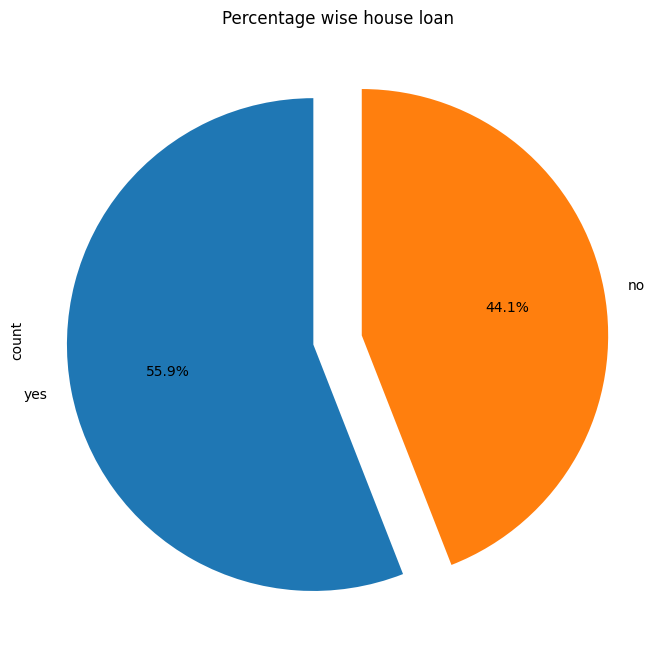

In [61]:
copy_data["housing_loan"].value_counts().plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, explode=(0.1,0.1), title='Percentage wise house loan')

In [62]:
copy_data.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

**Personal Loan**

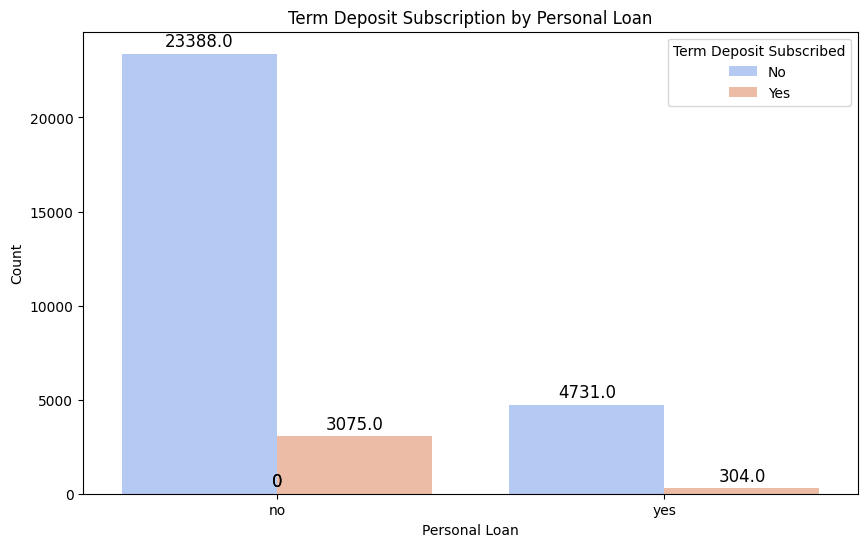

In [63]:
# Bar Plot for Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='personal_loan', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


**Communication Type**

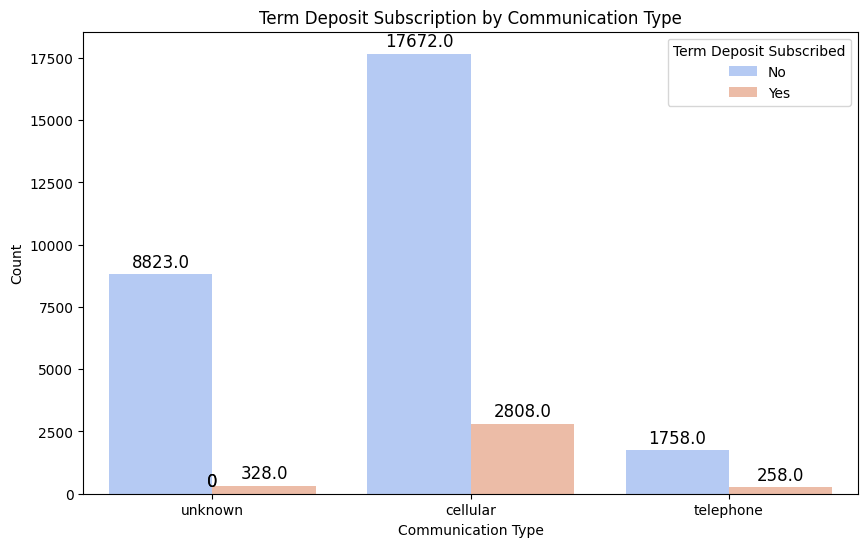

In [64]:
# Bar Plot for Communication Type
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='communication_type', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Communication Type')
plt.xlabel('Communication Type')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


**Day of Month**

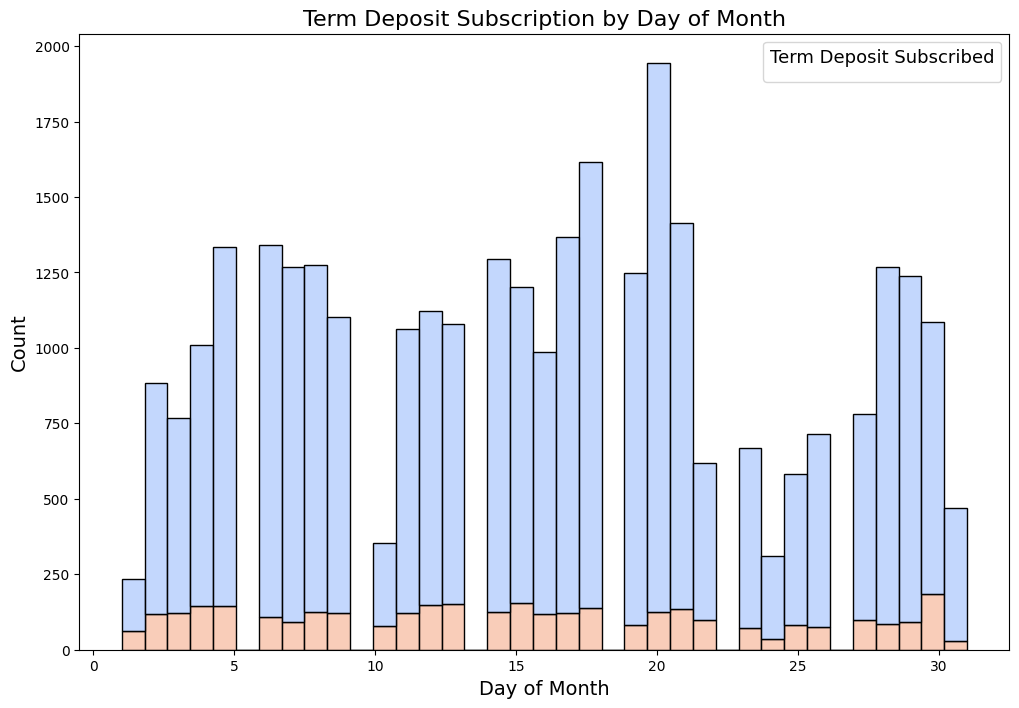

In [65]:

# Assuming cleaned_data is your DataFrame and 'term_deposit_subscribed' is a categorical column

plt.figure(figsize=(12, 8))
sns.histplot(
    data=cleaned_data,
    x='day_of_month',
    hue='term_deposit_subscribed',
    multiple='stack',
    palette="coolwarm",
    alpha=0.7,
    edgecolor='black'
)

# Adding titles and labels
plt.title('Term Deposit Subscription by Day of Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding legend with title
plt.legend(title='Term Deposit Subscribed', title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

**Month**

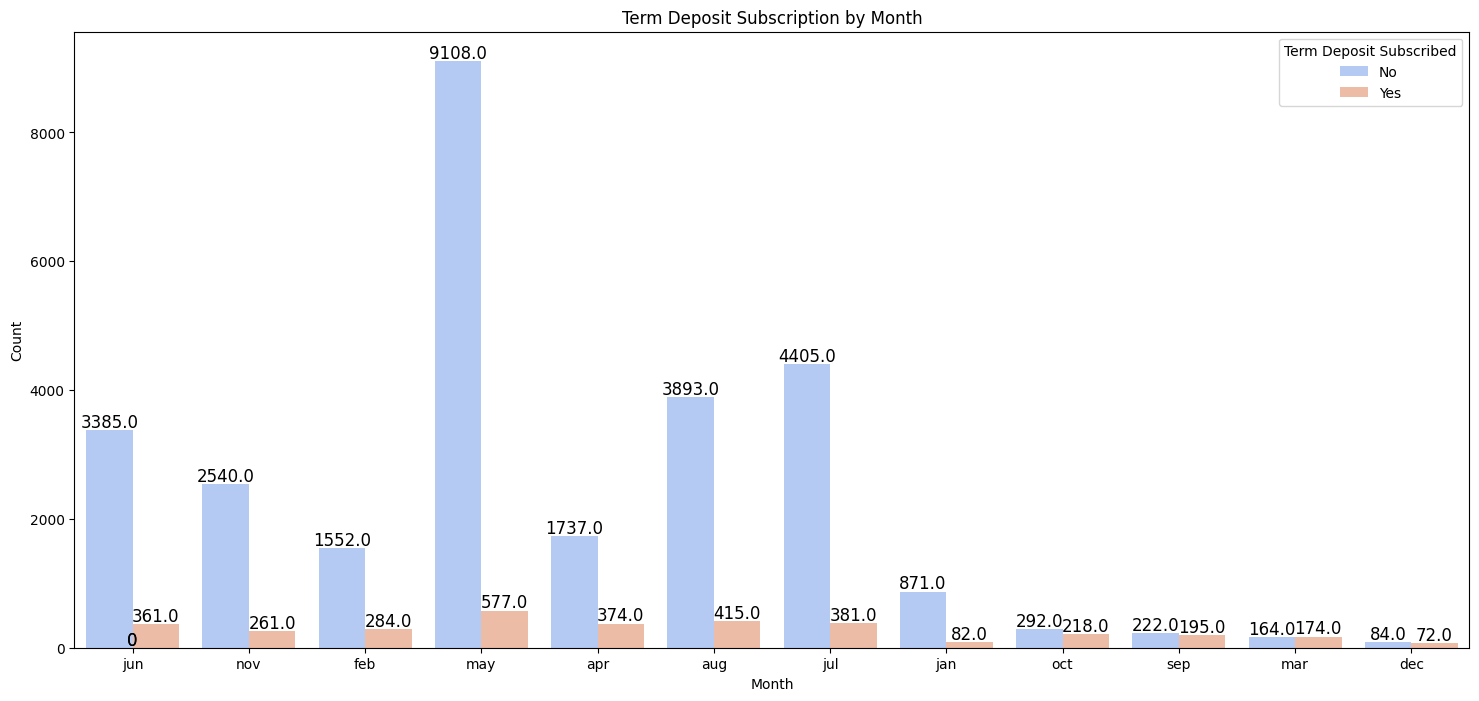

In [66]:
# Bar Plot for Month
plt.figure(figsize=(18, 8))
sns.countplot(data=cleaned_data, x='month', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 2),
                textcoords='offset points')

plt.show()


**Last Contact Duration**

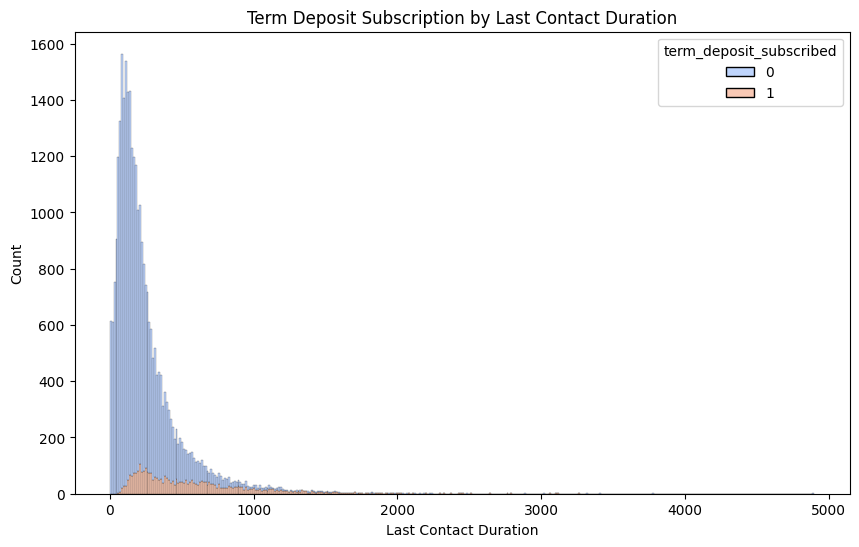

In [67]:
# Histogram for Last Contact Duration
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='last_contact_duration', hue='term_deposit_subscribed', multiple='stack', palette="coolwarm")
plt.title('Term Deposit Subscription by Last Contact Duration')
plt.xlabel('Last Contact Duration')
plt.ylabel('Count')
plt.show()


**Number of Contacts in Campaign**

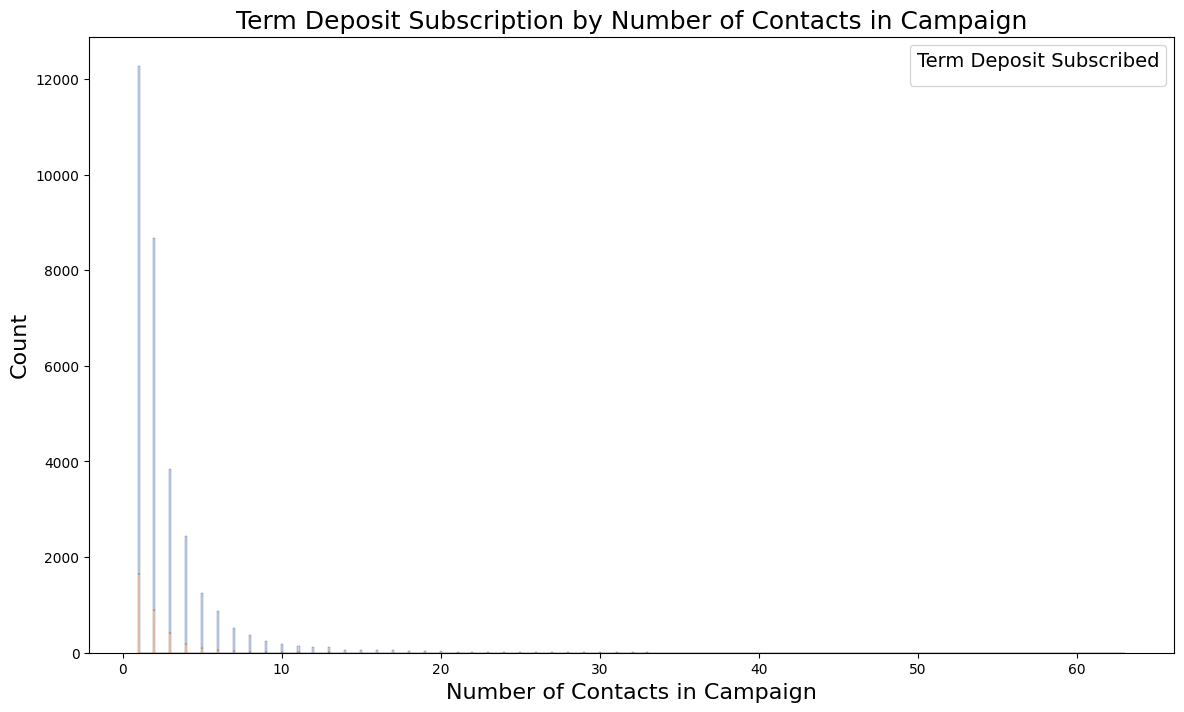

In [68]:


# Assuming cleaned_data is your DataFrame and 'term_deposit_subscribed' is a categorical column

plt.figure(figsize=(14, 8))  # Increased figure size for better visualization
sns.histplot(
    data=cleaned_data,
    x='num_contacts_in_campaign',
    hue='term_deposit_subscribed',
    multiple='stack',
    palette="coolwarm",
    alpha=0.7,
    edgecolor='black'
)

# Adding titles and labels
plt.title('Term Deposit Subscription by Number of Contacts in Campaign', fontsize=18)
plt.xlabel('Number of Contacts in Campaign', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Adding legend with title
plt.legend(title='Term Deposit Subscribed', title_fontsize='14', fontsize='12')

# Adjust x and y limits if necessary (commented out, use if needed)
# plt.xlim(0, max(cleaned_data['num_contacts_in_campaign'])+1)
# plt.ylim(0, max_count + 10) # Assuming max_count is calculated based on your data

# Show the plot
plt.show()


<ipython-input-69-61c1bfc0a01d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='term_deposit_subscribed', y='num_contacts_in_campaign', palette="coolwarm")


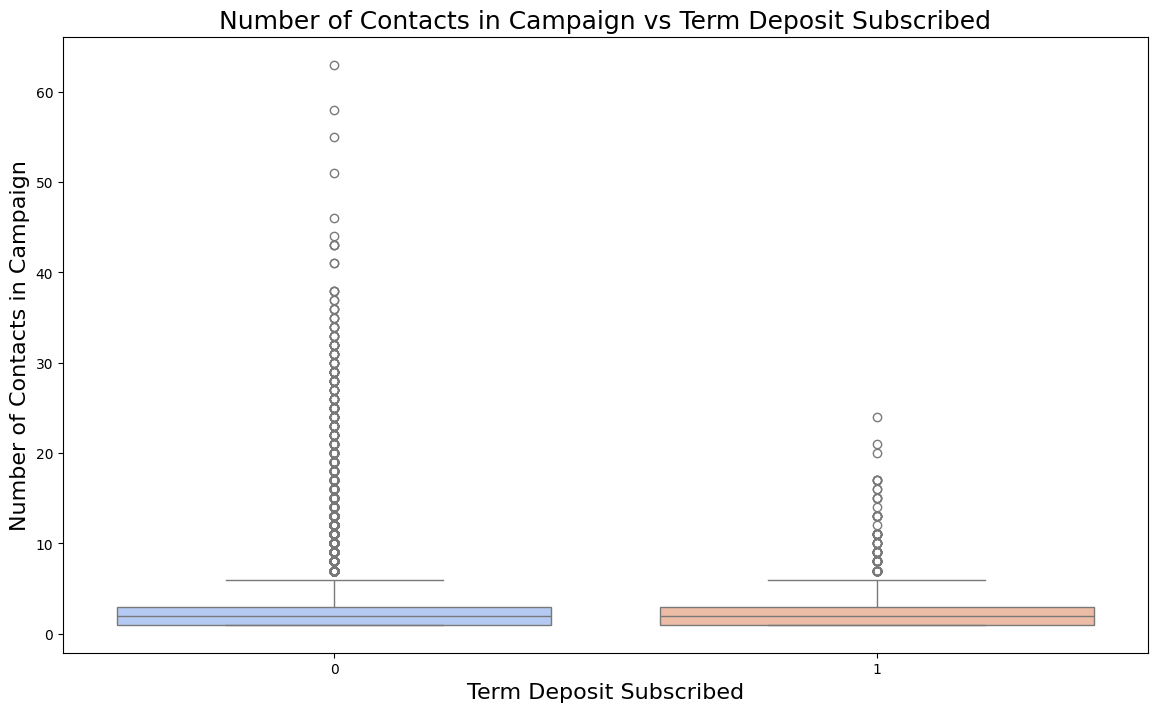

In [69]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=cleaned_data, x='term_deposit_subscribed', y='num_contacts_in_campaign', palette="coolwarm")
plt.title('Number of Contacts in Campaign vs Term Deposit Subscribed', fontsize=18)
plt.xlabel('Term Deposit Subscribed', fontsize=16)
plt.ylabel('Number of Contacts in Campaign', fontsize=16)
plt.show()

**Previous Campaign Outcome**

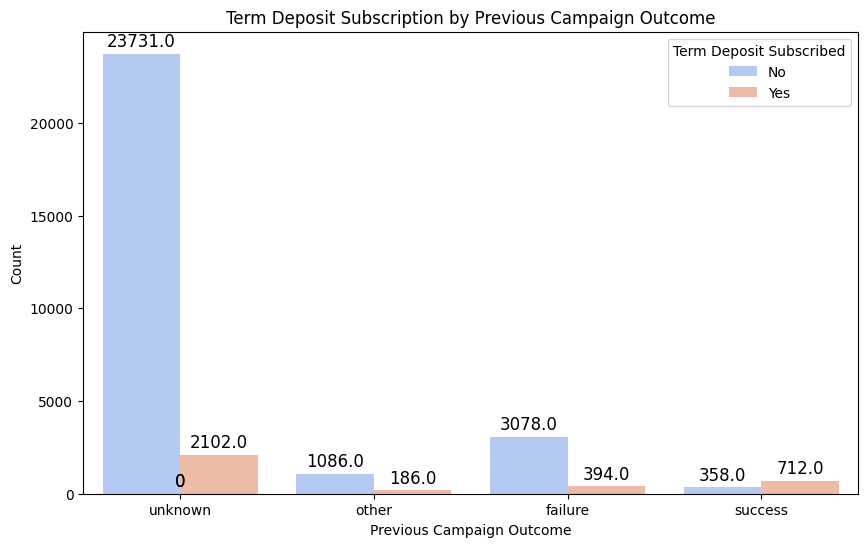

In [70]:
# Bar Plot for Previous Campaign Outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='prev_campaign_outcome', hue='term_deposit_subscribed', palette="coolwarm")
plt.title('Term Deposit Subscription by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.legend(title='Term Deposit Subscribed', labels=['No', 'Yes'])

# Add counts on top of the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()
